<a href="https://colab.research.google.com/github/childult-programmer/Tistory-DeepLearning/blob/master/LSTM_Predict_number_to_come_next.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data preparation

In [3]:
Data = [[[(i+j)/100] for i in range (5)] for j in range (100)]
target = [(i+5)/100 for i in range (100)]

In [4]:
Data[0]

[[0.0], [0.01], [0.02], [0.03], [0.04]]

In [5]:
target[0]

0.05

In [6]:
data = np.array(Data, dtype=float)
target = np.array(target, dtype=float) 

In [7]:
data.shape

(100, 5, 1)

In [8]:
target.shape

(100,)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 4)

In [10]:
# RNN model

In [11]:
model = Sequential()

In [12]:
model.add(LSTM((1), batch_input_shape=(None, None, 1), return_sequences=True))
model.add(LSTM((1), return_sequences=False))

In [13]:
model.compile(loss = 'mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 1)           12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Since it is a simple operation, we will only repeat 100 epochs
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 243ms/step - loss: 0.5464 - accuracy: 0.0000e+00 - val_loss: 0.4371 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.5399 - accuracy: 0.0000e+00 - val_loss: 0.4310 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.5333 - accuracy: 0.0000e+00 - val_loss: 0.4248 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 0.5265 - accuracy: 0.0000e+00 - val_loss: 0.4184 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5195 - accuracy: 0.0000e+00 - val_loss: 0.4118 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5124 - accuracy: 0.0000e+00 - val_loss: 0.4050 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5050 - accuracy: 0.0000e+00 - val_loss: 0.

In [16]:
results = model.predict(x_test)

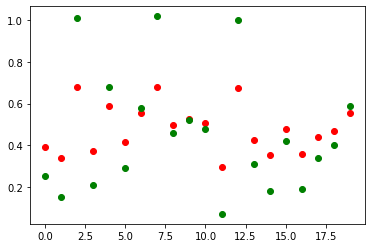

In [17]:
plt.scatter(range(20), results, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

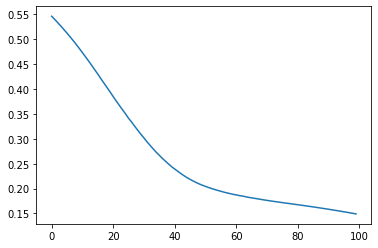

In [18]:
# cost change
plt.plot(history.history['loss'])
plt.show()